In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base() 
Base.prepare(autoload_with=engine) 

In [6]:
# View all of the classes that automap found
Base.classes.keys() 

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.('2017-08-23',)
session.query(measurement.date).order_by(measurement.date.desc()).first()

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
prcpd=session.query(measurement.date, measurement.prcp).\
filter(measurement.date <='2017-08-23').\
filter(measurement.date> '2016-08-23').\
order_by(measurement.date).all()
prcpd

[('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.0),
 ('2016-08-30', 0.0),
 (

In [11]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(prcpd, columns=['Date',"Precipitation"])
# Sort the dataframe by date
df=df.sort_values(by=['Date'])
df

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


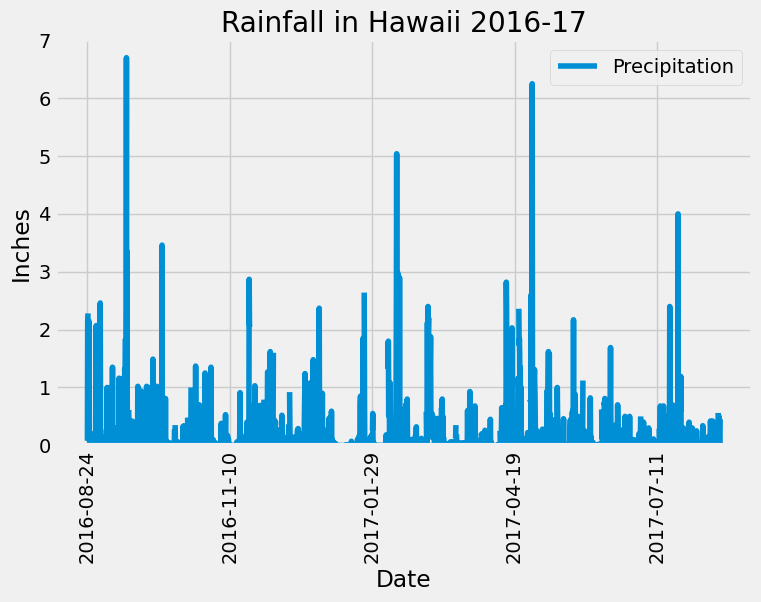

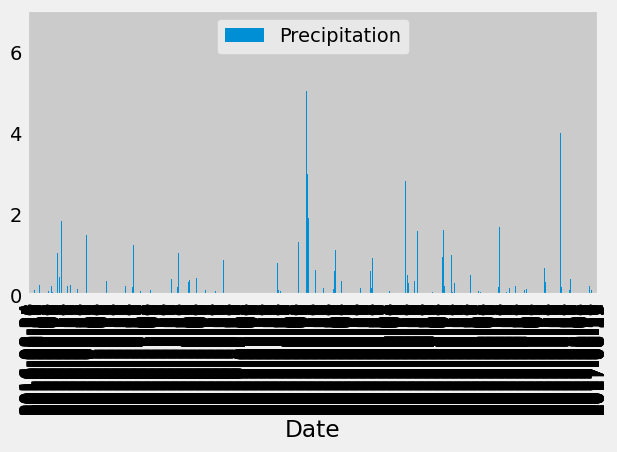

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date',inplace=True)
plot_data=df.plot(figsize=(8,5),ylim=(0.,7),title="Rainfall in Hawaii 2016-17",rot=90)
df.plot.bar()
plot_data.set_xlabel('Date')
plot_data.set_ylabel('Inches')
plt.tight_layout()
plt.savefig("rainfall_bar.png")
plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
stats=df.describe()
stats

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset [(9,)]
session.query(station).count

<bound method Query.count of <sqlalchemy.orm.query.Query object at 0x7f9ffea5fc10>>

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station, func.count(measurement.id)).\
    group_by(measurement.station).\
    order_by(measurement.date > '2016-08-23').\
    order_by(func.count(measurement.id).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.[(54.0, 85.0, 71.66378066378067)]
temp_sum = session.query(measurement.station, func.min(measurement.tobs),func.max(measurement.tobs),func.avg(measurement.tobs)).\
    filter(measurement.station == 'USC00519281').\
    group_by(measurement.station)

for active_station in temp_sum:
    print(active_station )

('USC00519281', 54.0, 85.0, 71.66378066378067)


In [25]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and 
station_year = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519281', ).\
    filter(measurement.date <= '2017-08-23').\
    filter(measurement.date > '2016-08-23').\
    group_by(measurement.date).\
    order_by(measurement.date).all()
# Save the query results into a Data Frame
station_df = pd.DataFrame(station_year, columns = ['Date', 'Temperature'])
station_df

,Date,Temperature
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


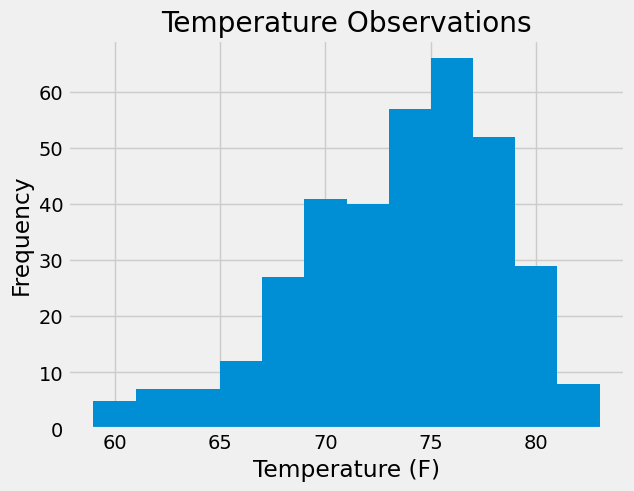

In [31]:
#plot the results as a histogram Text(0.5, 4.183333333333314, 'Temperature')
plt.hist(station_df['Temperature'], bins = 12)
plt.title("Temperature Observations")
plt.xlabel("Temperature (F)")
plt.ylabel("Frequency")

plt.savefig("histogram.png")
plt.show()


# Close Session

In [29]:
# Close Session
session.close()